# Building a Classfication model with neural networks

### 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

np.random.seed(1234)

### 2. Dataset

In [2]:
m = 30

X = np.random.randint(0, 2, (2, m))
Y = np.logical_and(X[0] == 0, X[1] == 1).astype(int).reshape((1, m))

print('Training dataset X containing (x1, x2) coordinates in the columns:')
print(X)
print('Training dataset Y containing labels of two classes (0: blue, 1: red)')
print(Y)

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('Number of training examples = ' + str(X.shape[1]))

Training dataset X containing (x1, x2) coordinates in the columns:
[[1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]
 [1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0]]
Training dataset Y containing labels of two classes (0: blue, 1: red)
[[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0]]
The shape of X is: (2, 30)
The shape of Y is: (1, 30)
Number of training examples = 30


### 2. Defining Activation Function

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436


# 3.Implementing Neural Network

### 3.1 - Defining the Neural Network Structure

In [4]:
def layer_sizes(X, Y):
    """
    Args:
    X -- input dataset
    Y -- labels
    
    Returns:
    n_x -- size of input layer
    n_y -- size of output layer
    """
    
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_y)

(n_x, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the output layer is: n_y = 1


### 3.2 Initializing Model Parameters

In [5]:
def initialize_parameters(n_x, n_y):
    """
    Args:
        n_x -- size of input layer
        n_y -- size of output layer
    
    Returns:
    parameters -- python dict containing:
                        W -- weights matrix for neural network
                        b -- bias value set as vector
    """
    
    W = np.random.rand(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    
    parameters = {"W" : W,
                  "b" : b}
    
    return parameters

parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.00869127 0.00436173]]
b = [[0.]]


### 3.3 Forward Propagation And Backward Propagation

Implementing `forward_propagation()` following the equation:
\begin{align}
Z &=  W X + b,\\
A &= \sigma\left(Z\right).
\end{align}

In [6]:
def forward_propagation(X, parameters):
    """
    Args:
        X -- input data
        parameters -- python dict containing:
                        W -- weights matrix for neural network
                        b -- bias value set as vector
    Returns:
        A -- The output
    """
    W = parameters["W"]
    b = parameters["b"]
    
    # Forward Propagation to calculate Z
    Z = np.matmul(W, X) + b
    A = sigmoid(Z)
    
    return A

A = forward_propagation(X, parameters)

print("Output vector A:", A)

Output vector A: [[0.50326321 0.5021728  0.5        0.50326321 0.5        0.50109043
  0.5        0.5021728  0.5021728  0.50326321 0.50326321 0.50326321
  0.5        0.50109043 0.50326321 0.5        0.50109043 0.5
  0.50109043 0.5        0.50109043 0.50109043 0.50109043 0.50109043
  0.5021728  0.50109043 0.5021728  0.50326321 0.50109043 0.5       ]]


Computing cost using `computing_cost()` to update parameters

In [7]:
def compute_cost(A, Y):
    # Computes the log loss
    """
    Args:
        A -- The output of the neural network
        Y -- Orginal output values to the input
        
    Returns:
    cost -- log loss
    """
    
    m = Y.shape[1]
    
    # Computing Cost
    logprobs = - np.multiply(np.log(A), Y) - np.multiply(np.log(1 - A), 1 - Y)
    cost = 1/m * np.sum(logprobs)
    
    return cost

print("cost = " + str(compute_cost(A, Y)))

cost = 0.6946746844429882


In [8]:
def backward_propagation(A, X, Y):
    """Implements the backward propagation, calculating gradients

    Args:
        A -- the output of the neural network
        X -- input data
        Y -- "true" labels vectors
    
    Returns:
        grads -- pythin dice containing gradients
    """
    
    m = X.shape[1]
    dZ = A - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    grads = {"dW" : dW,
             "db" : db}
    
    return grads

grads = backward_propagation(A, X, Y)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

dW = [[ 0.20112355 -0.04887511]]
db = [[0.16815369]]


### 3.4 Updating Parameters

In [9]:
def update_parameters(parameters, grads, learning_rate = 1.5):
    """Update parameters using gradient descent update rule

    Args:
        parameters -- python dictionary containing parameters 
        grads -- python dictionary containing gradients 
        learning_rate -- learning rate parameter for gradient descent
        
    Returns:
        parameters -- python dictionary containing updated parameters 
    """
    
    W, b = parameters["W"], parameters["b"]
    dW, db = grads["dW"], grads["db"]
    
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    parameters = {"W" : W,
                  "b" : b}
    
    return parameters

parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [[-0.29299405  0.0776744 ]]
b updated = [[-0.25223054]]


### 3.5 Integrating all the helper functions in `nn_model()` to make predictions

In [10]:
def nn_model(X, Y, num_iterations, learning_rate, print_cost = False):
    """
    Args:
        X -- dataset
        Y -- labels
        num_iterations -- number of iterations in the loop
        learning_rate -- learning rate parameter for gradient descent
        print_cost -- if True, print the cost every iteration
    
    Returns:
        parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    parameters = initialize_parameters(n_x, n_y)
    
    for i in range(0, num_iterations):
        A = forward_propagation(X, parameters)
        cost = compute_cost(A, Y)
        grads = backward_propagation(A, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost:
            print("Cost after iteration %i: %f" %(i, cost))
        
    return parameters

In [11]:
parameters = nn_model(X, Y, num_iterations=100, learning_rate=1.5, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

Cost after iteration 0: 0.694684
Cost after iteration 1: 0.604666
Cost after iteration 2: 0.550956
Cost after iteration 3: 0.508911
Cost after iteration 4: 0.473439
Cost after iteration 5: 0.442817
Cost after iteration 6: 0.416077
Cost after iteration 7: 0.392519
Cost after iteration 8: 0.371598
Cost after iteration 9: 0.352885
Cost after iteration 10: 0.336035
Cost after iteration 11: 0.320771
Cost after iteration 12: 0.306870
Cost after iteration 13: 0.294147
Cost after iteration 14: 0.282452
Cost after iteration 15: 0.271659
Cost after iteration 16: 0.261662
Cost after iteration 17: 0.252373
Cost after iteration 18: 0.243717
Cost after iteration 19: 0.235627
Cost after iteration 20: 0.228049
Cost after iteration 21: 0.220934
Cost after iteration 22: 0.214240
Cost after iteration 23: 0.207929
Cost after iteration 24: 0.201969
Cost after iteration 25: 0.196331
Cost after iteration 26: 0.190990
Cost after iteration 27: 0.185921
Cost after iteration 28: 0.181105
Cost after iteration 29:

You can see that after about $60$ iterations the cost function does keep decreasing, but not as much. It is a sign that it might be reasonable to stop training there. The final model parameters can be used to find the boundary line and for making predictions.

### 4. Visualizing boundry line

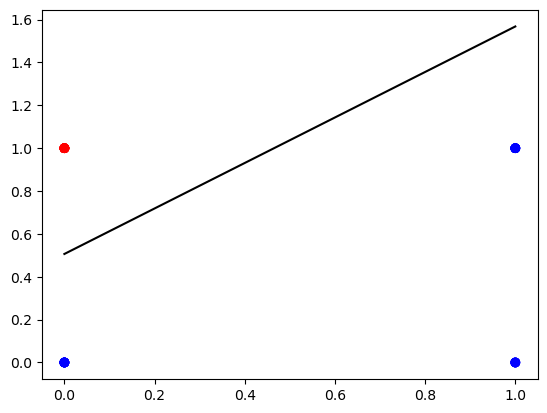

In [12]:
def plot_decision_boundary(X, Y, parameters):
    W, b = parameters["W"], parameters["b"]
    flg, ax = plt.subplots()
    plt.scatter(X[0, :], X[1, :], c = Y, cmap = colors.ListedColormap(['blue', 'red']));
    x_line = np.arange(np.min(X[0, :]), np.max(X[0, :]) * 1.1, 0.1)
    ax.plot(x_line, -W[0, 0] / W[0, 1] * x_line + -b[0,0] / W[0, 1], color = "black")
    plt.plot()
    plt.show()
    
plot_decision_boundary(X, Y, parameters)

### 5. Predicting Values

In [13]:
def predict(X, parameters):
    """Using the learned parameters to predict a class for each example in X

    Args:
        parameters -- python dictionary containing your parameters 
        X -- input data of size (n_x, m)
    
    Returns:
        predictions -- vectr of predictions of our model
    """
    A = forward_propagation(X, parameters)
    predictions = A > 0.5
    
    return predictions

X_pred = np.array([[1, 1, 0, 0],
                   [0, 1, 0, 1]])
Y_pred = predict(X_pred, parameters)

print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")

Coordinates (in the columns):
[[1 1 0 0]
 [0 1 0 1]]
Predictions:
[[False False False  True]]
